# Exploratory data analysis using pandas

The data I'll be looking at contains statistics from the FIFA World Cup over the years, and is available at: <br>
https://www.kaggle.com/datasets/piterfm/fifa-football-world-cup

### Let's start off by importing some libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Let's now explore the data!
The data is stored in csv-files and can be read into pandas dataframes using 'pd.read_csv'. <br> There are 4 different files - let's create a dataframe from each one of them.

In [90]:
df_ranking = pd.read_csv("fifa_ranking_2022-10-06.csv")
df_matches_2018 = pd.read_csv("matches_1930_2018.csv")
df_matches_2022 = pd.read_csv("matches_2022.csv")
df_wc = pd.read_csv("world_cup.csv")

Let's see the shapes of the dataframes!

In [3]:
print(f"Shape of df_ranking:\t\t {df_ranking.shape}")
print(f"Shape of df_matches_2018:\t {df_matches_2018.shape}")
print(f"Shape of df_matches_2020:\t {df_matches_2022.shape}")
print(f"Shape of df_wc:\t\t\t {df_wc.shape}")

Shape of df_ranking:		 (211, 7)
Shape of df_matches_2018:	 (900, 24)
Shape of df_matches_2020:	 (57, 24)
Shape of df_wc:			 (22, 9)


Let's look closer at 'df_ranking'

In [4]:
df_ranking.head()

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46


In [5]:
df_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             211 non-null    object 
 1   team_code        211 non-null    object 
 2   association      211 non-null    object 
 3   rank             211 non-null    int64  
 4   previous_rank    211 non-null    int64  
 5   points           211 non-null    float64
 6   previous_points  211 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.7+ KB


In [6]:
df_ranking.describe()

,rank,previous_rank,points,previous_points
count,211.00000,211.00000,211.000000,211.000000
mean,106.00000,106.00000,1220.687346,1220.645592
std,61.05462,61.05462,253.420954,253.331712
min,1.00000,1.00000,762.220000,763.820000
25%,53.50000,53.50000,1007.675000,1008.330000
50%,106.00000,106.00000,1192.090000,1183.900000
75%,158.50000,158.50000,1433.465000,1431.790000
max,211.00000,211.00000,1841.300000,1837.560000


In [7]:
print(f"Num null for df_ranking:\n{df_ranking.isna().sum()}")

Num null for df_ranking:
team               0
team_code          0
association        0
rank               0
previous_rank      0
points             0
previous_points    0
dtype: int64


We can see that there are 7 columns and no null values anywhere in the dataframe. <br>
Let's look at the top 10 countries by score.

In [8]:
df_ranking_top10 = df_ranking.sort_values(by="points", ascending=False).reset_index(drop=True)[0:10]

df_ranking_top10

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46
5,Italy,ITA,UEFA,6,7,1726.14,1713.86
6,Spain,ESP,UEFA,7,6,1715.22,1716.93
7,Netherlands,NED,UEFA,8,8,1694.51,1679.41
8,Portugal,POR,UEFA,9,9,1676.56,1678.65
9,Denmark,DEN,UEFA,10,10,1666.57,1665.47


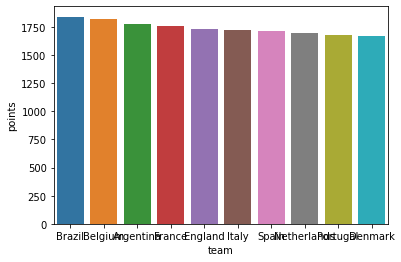

In [9]:
sns.barplot(data=df_ranking_top10, x="team", y="points")
plt.show()

Let's try to make this plot a little nicer looking!

<ipython-input-10-ad981f43af67>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks().astype(int), fontdict=ax_font)


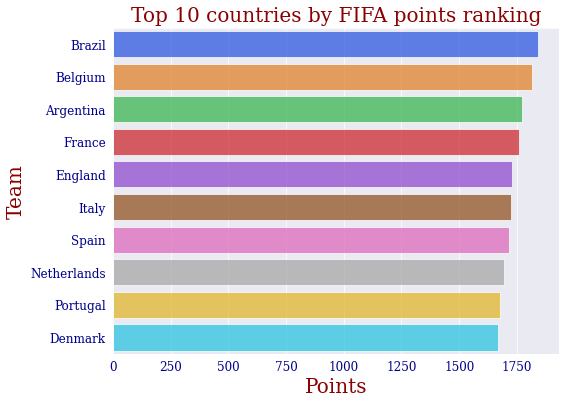

In [10]:
sns.set_style("darkgrid")

ax_font = {
    "color":"darkblue",
    "size":12,
    "family":"serif",
    "weight":"normal"
}

label_font = {
    "color":"darkred",
    "size":20,
    "family":"serif",
    "weight":"normal"
}


fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=df_ranking_top10, y="team", x="points", ax=ax, palette="bright", alpha=0.7)
#ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), tick_params=ax_font)
ax.set_xticklabels(ax.get_xticks().astype(int), fontdict=ax_font)
ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontdict=ax_font)
ax.set_xlabel("Points", fontdict=label_font)
ax.set_ylabel("Team", fontdict=label_font)
ax.set_title("Top 10 countries by FIFA points ranking", fontdict=label_font)

plt.show()

Which team made the best improvement from last ranking? <br>
Let's add two new columns to the dataframe: '*change_points*' and '*change_ranking*'.

Note that for 'points', it's preferable to have a larger number and for 'rank' it's preferable to have a smaller number. <br>
The change columns will indicate direction towards better from previous rank to this rank.

In [37]:
df_ranking["change_points"] = df_ranking.points - df_ranking.previous_points
df_ranking["change_rank"] = df_ranking.previous_rank - df_ranking["rank"]

df_ranking.head()

,team,team_code,association,rank,previous_rank,points,previous_points,change_points,change_rank
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56,3.74,0
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92,-5.21,0
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65,3.23,0
3,France,FRA,UEFA,4,4,1759.78,1764.85,-5.07,0
4,England,ENG,UEFA,5,5,1728.47,1737.46,-8.99,0


Let's see who's the best in terms of change in points!

In [38]:
df_ranking_change_points = df_ranking.sort_values(by="change_points", ascending=False).reset_index(drop=True)
df_ranking_change_points.head(10)

,team,team_code,association,rank,previous_rank,points,previous_points,change_points,change_rank
0,Azerbaijan,AZE,UEFA,123,128,1146.72,1127.17,19.55,5
1,Scotland,SCO,UEFA,40,45,1479.53,1462.96,16.57,5
2,Moldova,MDA,UEFA,174,177,961.23,944.96,16.27,3
3,Mauritania,MTN,CAF,103,107,1197.58,1181.86,15.72,4
4,Netherlands,NED,UEFA,8,8,1694.51,1679.41,15.10,0
5,Indonesia,IDN,AFC,152,155,1033.90,1019.19,14.71,3
6,Switzerland,SUI,UEFA,15,16,1635.92,1621.43,14.49,1
7,Serbia,SRB,UEFA,21,25,1563.62,1549.53,14.09,4
8,Croatia,CRO,UEFA,12,15,1645.64,1632.15,13.49,3
9,Italy,ITA,UEFA,6,7,1726.14,1713.86,12.28,1


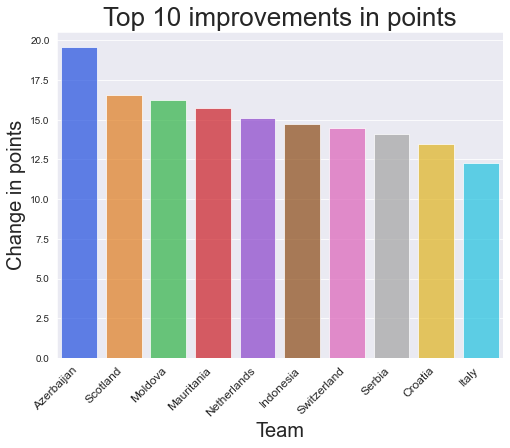

In [39]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=df_ranking_change_points[0:10], x="team", y="change_points", palette="bright", alpha=0.7, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
ax.set_xlabel("Team", fontsize=20)
ax.set_ylabel("Change in points", fontsize=20)
ax.set_title("Top 10 improvements in points", fontsize=26)
plt.show()

Let's try to filter the dataframe a little bit! Let's look at teams in UEFA with more points than 1200.

In [41]:
df_ranking_europe_top10 = df_ranking.query("association == 'UEFA' and points > 1200").reset_index(drop=True)
df_ranking_europe_top10.head()

,team,team_code,association,rank,previous_rank,points,previous_points,change_points,change_rank
0,Belgium,BEL,UEFA,2,2,1816.71,1821.92,-5.21,0
1,France,FRA,UEFA,4,4,1759.78,1764.85,-5.07,0
2,England,ENG,UEFA,5,5,1728.47,1737.46,-8.99,0
3,Italy,ITA,UEFA,6,7,1726.14,1713.86,12.28,1
4,Spain,ESP,UEFA,7,6,1715.22,1716.93,-1.71,-1


Let's see how many members each association has! And then some stats for the different associations.

In [48]:
df_ranking.association.value_counts()

UEFA        55
CAF         54
AFC         46
CONCACAF    35
OFC         11
CONMEBOL    10
Name: association, dtype: int64

In [53]:
df_ranking_group = df_ranking.groupby("association")[["rank","previous_rank","change_rank","points","previous_points","change_points"]]\
    .agg([np.min, np.max])

df_ranking_group

rank      previous_rank      change_rank        points           \
            amin amax          amin amax        amin amax     amin     amax   
association                                                                   
AFC           20  207            22  207          -4    3   825.25  1564.61   
CAF           18  203            18  204          -5    4   854.72  1584.38   
CONCACAF      13  210            12  210          -3    4   790.74  1644.89   
CONMEBOL       1   82             1   81          -2    3  1296.28  1841.30   
OFC          105  197           103  197          -2    2   861.81  1193.98   
UEFA           2  211             2  211          -6    5   762.22  1816.71   

            previous_points          change_points         
                       amin     amax          amin   amax  
association                                                
AFC                  825.25  1558.64         -9.15  14.71  
CAF                  854.72  1584.59        -13.51  15.72  
CONCACAF             790.74  1649.57        -14.71   5.28  
CONMEBOL            1298.81  1837.56         -5.25   8.64  
OFC                  861.81  1198.96         -4.98   9.86  
UEFA                 763.82  1821.92        -16.69  19.55

Which team in UEFA dropped 6 spots?

In [58]:
df_ranking.query("association == 'UEFA'").loc[df_ranking.change_rank.idxmin()]

team                Norway
team_code              NOR
association           UEFA
rank                    42
previous_rank           36
points             1473.04
previous_points    1488.57
change_points       -15.53
change_rank             -6
Name: 41, dtype: object

In [62]:
df_ranking.query("association == 'UEFA'").sort_values(by="change_rank").iloc[0]

team                Norway
team_code              NOR
association           UEFA
rank                    42
previous_rank           36
points             1473.04
previous_points    1488.57
change_points       -15.53
change_rank             -6
Name: 41, dtype: object

## Let's look at the other dataframes!

In [64]:
df_matches_2018.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,Attendance,Venue,Officials,Date,Score,Referee,Notes,Round,Host,Year
0,France,Croatia,4,1.1,NaN,2,1.1,NaN,Didier Deschamps,Hugo Lloris,...,78011,"Olimpiyskiy stadion Luzhniki, Moskva",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,2018-07-15,4–2,Néstor Pitana,NaN,Final,Russia,2018
1,Belgium,England,2,1.5,NaN,0,1.0,NaN,Roberto Martínez,Eden Hazard,...,64406,"Gazprom Arena, Sankt-Petersburg",Alireza Faghani (Referee) · Reza Sokhandan (AR...,2018-07-14,2–0,Alireza Faghani,NaN,Third-place match,Russia,2018
2,Croatia,England,2,1.7,NaN,1,0.6,NaN,Zlatko Dalić,Luka Modrić,...,78011,"Olimpiyskiy stadion Luzhniki, Moskva",Cüneyt Çakιr (Referee) · Bahattin Duran (AR1) ...,2018-07-11,2–1,Cüneyt Çakιr,Required Extra Time,Semi-finals,Russia,2018
3,France,Belgium,1,1.7,NaN,0,0.4,NaN,Didier Deschamps,Hugo Lloris,...,64286,"Gazprom Arena, Sankt-Petersburg",Andrés Cunha (Referee) · Nicolás Tarán (AR1) ·...,2018-07-10,1–0,Andrés Cunha,NaN,Semi-finals,Russia,2018
4,Sweden,England,0,0.5,NaN,2,1.0,NaN,Janne Andersson,Andreas Granqvist,...,39991,"Cosmos Arena, Samara",Björn Kuipers (Referee) · Sander van Roekel (A...,2018-07-07,0–2,Björn Kuipers,NaN,Quarter-finals,Russia,2018


In [65]:
df_matches_2022.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,Attendance,Venue,Officials,Date,Score,Referee,Notes,Round,Host,Year
0,Qatar,Ecuador,0.0,0.3,NaN,2.0,1.2,NaN,Félix Sánchez,Hassan Al-Haydos,...,67372,"Al Bayt Stadium, Al Khor",Daniele Orsato (Referee) · Ciro Carbone (AR1) ...,2022-11-20,0–2,Daniele Orsato,NaN,Group stage,Qatar,2022
1,England,IR Iran,6.0,2.1,NaN,2.0,1.4,NaN,Gareth Southgate,Harry Kane,...,45334,"Khalifa International Stadium, Doha",Raphael Claus (Referee) · Rodrigo Correa (AR1)...,2022-11-21,6–2,Raphael Claus,NaN,Group stage,Qatar,2022
2,United States,Wales,1.0,0.8,NaN,1.0,1.5,NaN,Gregg Berhalter,Tyler Adams,...,43418,"Ahmed bin Ali Stadium, Umm al-Afā'ī",Abdulrahman Ibrahim Al Jassim (Referee) · Tale...,2022-11-21,1–1,Abdulrahman Ibrahim Al Jassim,NaN,Group stage,Qatar,2022
3,Senegal,Netherlands,0.0,0.9,NaN,2.0,0.7,NaN,Aliou Cissé,Kalidou Koulibaly,...,41721,"Al Thumama Stadium, ath-Thumāma",Wilton Sampaio (Referee) · Bruno Boschilia (AR...,2022-11-21,0–2,Wilton Sampaio,NaN,Group stage,Qatar,2022
4,France,Australia,4.0,4.0,NaN,1.0,0.5,NaN,Didier Deschamps,Hugo Lloris,...,40875,"Al Janoub Stadium, Al Wakrah",Victor Gomes (Referee) · Zakhele Siwela (AR1) ...,2022-11-22,4–1,Victor Gomes,NaN,Group stage,Qatar,2022


The 2022 dataset is very small, let's focus on the larger on instead.

In [66]:
df_matches_2018.describe()

,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,Attendance,Year
count,900.000000,64.000000,30.000000,900.000000,64.000000,30.000000,900.000000,900.000000
mean,1.791111,1.490625,3.333333,1.040000,1.114063,3.200000,45160.178889,1986.915556
std,1.599753,0.832422,1.241060,1.072749,0.631166,1.030567,22964.653635,23.150270
min,0.000000,0.200000,0.000000,0.000000,0.100000,1.000000,2000.000000,1930.000000
25%,1.000000,0.900000,3.000000,0.000000,0.700000,2.250000,30760.000000,1970.000000
50%,1.000000,1.400000,3.000000,1.000000,1.000000,3.000000,42000.000000,1990.000000
75%,3.000000,1.925000,4.000000,2.000000,1.400000,4.000000,60781.000000,2006.000000
max,10.000000,5.200000,5.000000,7.000000,2.800000,5.000000,173850.000000,2018.000000


In [67]:
df_matches_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   home_team     900 non-null    object 
 1   away_team     900 non-null    object 
 2   home_score    900 non-null    int64  
 3   home_xg       64 non-null     float64
 4   home_penalty  30 non-null     float64
 5   away_score    900 non-null    int64  
 6   away_xg       64 non-null     float64
 7   away_penalty  30 non-null     float64
 8   home_manager  900 non-null    object 
 9   home_captain  580 non-null    object 
 10  away_manager  900 non-null    object 
 11  away_captain  580 non-null    object 
 12  home_goals    738 non-null    object 
 13  away_goals    617 non-null    object 
 14  Attendance    900 non-null    int64  
 15  Venue         900 non-null    object 
 16  Officials     645 non-null    object 
 17  Date          900 non-null    object 
 18  Score         900 non-null    

Who is the most common referee?

In [72]:
df_matches_2018.Referee.value_counts()

Néstor Pitana         9
Joel Quiniou          8
Juan Gardeazabal      7
Jean Langenus         7
Benjamin Griffiths    7
                     ..
Branko Tesanic        1
Malcolm Moffatt       1
Generoso Dattilo      1
Arthur Blavier        1
Miroslav Stupar       1
Name: Referee, Length: 301, dtype: int64

Let's look at Néstor Pitana's games

In [73]:
df_matches_nestor = df_matches_2018.loc[df_matches_2018.Referee=="Néstor Pitana"].reset_index(drop=True)

df_matches_nestor

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,Attendance,Venue,Officials,Date,Score,Referee,Notes,Round,Host,Year
0,France,Croatia,4,1.1,NaN,2,1.1,NaN,Didier Deschamps,Hugo Lloris,...,78011,"Olimpiyskiy stadion Luzhniki, Moskva",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,2018-07-15,4–2,Néstor Pitana,NaN,Final,Russia,2018
1,Uruguay,France,0,0.9,NaN,2,0.5,NaN,Óscar Tabárez,Diego Godín,...,43319,"Stadion Nizhny Novgorod, Nizhny Novgorod",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,2018-07-06,0–2,Néstor Pitana,NaN,Quarter-finals,Russia,2018
2,Croatia,Denmark,1,2.5,3.0,1,0.9,2.0,Zlatko Dalić,Luka Modrić,...,40851,"Stadion Nizhny Novgorod, Nizhny Novgorod",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,2018-07-01,(3) 1–1 (2),Néstor Pitana,Croatia won on penalty kicks following extra time,Round of 16,Russia,2018
3,Mexico,Sweden,0,1.4,NaN,3,2.4,NaN,Juan Carlos Osorio,Andrés Guardado,...,33061,"Stadion Central'nyj, Yekaterinburg",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,2018-06-27,0–3,Néstor Pitana,NaN,Group stage,Russia,2018
4,Russia,Saudi Arabia,5,1.7,NaN,0,0.2,NaN,Stanislav Cherchesov,Igor Akinfeev,...,78011,"Olimpiyskiy stadion Luzhniki, Moskva",Néstor Pitana (Referee) · Juan Pablo Belatti (...,2018-06-14,5–0,Néstor Pitana,NaN,Group stage,Russia,2018
5,France,Germany,0,NaN,NaN,1,NaN,NaN,Didier Deschamps,NaN,...,74240,"Estadio Jornalista Mário Filho, Rio de Janeiro",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,2014-07-04,0–1,Néstor Pitana,NaN,Quarter-finals,Brazil,2014
6,Honduras,Switzerland,0,NaN,NaN,3,NaN,NaN,Luis Suárez,NaN,...,40322,"Arena da Amazônia, Manaus",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,2014-06-25,0–3,Néstor Pitana,NaN,Group stage,Brazil,2014
7,United States,Portugal,2,NaN,NaN,2,NaN,NaN,Jürgen Klinsmann,NaN,...,40123,"Arena da Amazônia, Manaus",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,2014-06-22,2–2,Néstor Pitana,NaN,Group stage,Brazil,2014
8,Russia,Korea Republic,1,NaN,NaN,1,NaN,NaN,Fabio Capello,NaN,...,37603,"Arena Pantanal, Cuiabá",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,2014-06-17,1–1,Néstor Pitana,NaN,Group stage,Brazil,2014


## Let's look at the world cup data

In [85]:
df_wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           22 non-null     int64 
 1   Host           22 non-null     object
 2   Teams          22 non-null     int64 
 3   Champion       21 non-null     object
 4   Runner-Up      21 non-null     object
 5   TopScorrer     21 non-null     object
 6   Attendance     22 non-null     int64 
 7   AttendanceAvg  22 non-null     int64 
 8   Matches        22 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 1.7+ KB


In [91]:
df_wc.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,NaN,NaN,NaN,0,0,0
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64


In [101]:
df_wc["topScorer"] = df_wc.TopScorrer.str.split("-").str[0]
df_wc["topScorer_goals"] = pd.to_numeric(df_wc.TopScorrer.str.split("-").str[1])
df_wc.drop(columns="TopScorrer")
df_wc.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches,topScorer,topScorer_goals
0,2022,Qatar,32,NaN,NaN,NaN,0,0,0,NaN,NaN
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64,Harry Kane,6.0
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64,James Rodríguez,6.0
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64,"Wesley Sneijder, Thomas Müller...",5.0
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64,Miroslav Klose,5.0


In [105]:
df_wc.sort_values(by="topScorer_goals", ascending=False, inplace=True)

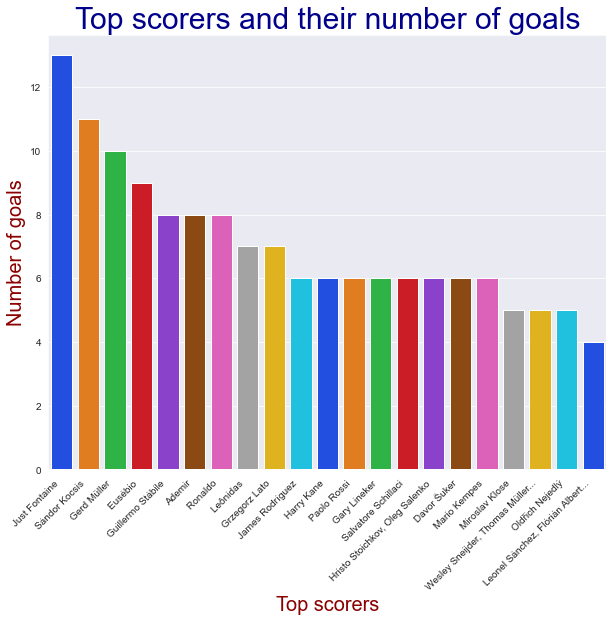

In [117]:
fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(data=df_wc, x="topScorer", y="topScorer_goals", palette="bright", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Top scorers", size=20, color="darkred")
ax.set_ylabel("Number of goals", size=20, color="darkred")
ax.set_title("Top scorers and their number of goals", size=30, color="darkblue")
plt.show()